# Titanic Survivor Analysis

Scope of the project: given a test set of Titanic passenger information, build a model that predicts whether a passenger would survive (1) or not (0).

Deliverable: trained model file  
Machine learning task: binary classification  
Target variable: Survived  
Win condition: X% accuracy  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Import training data
data = pd.read_csv('./Data/train.csv', index_col=0)

## Feature Information

All feature information in this cell is courtesy of the [Kaggle website](https://www.kaggle.com/c/titanic/data).

### Data Dictionary

|Variable | Definition | Key|
| --- | --- | --- |
|survival |Survival | 0 = No, 1 = Yes|
|pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex | Sex | |
|Age | Age in years | fractional is < 1; Est. in form xx.5|
|sibsp | # of siblings / spouses aboard the Titanic | |
|parch | # of parents / children aboard the Titanic | |
|ticket| Ticket number | |
|fare | Passenger fare | |
|cabin | Cabin number | |
|embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton|


### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them

## Explore the Data

In [16]:
# How many features and observations
data.shape

(891, 11)

In [23]:
# Feature data types and number of non-null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
# Feature summary statistics
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143dfef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1144fbeb8>]], dtype=object)

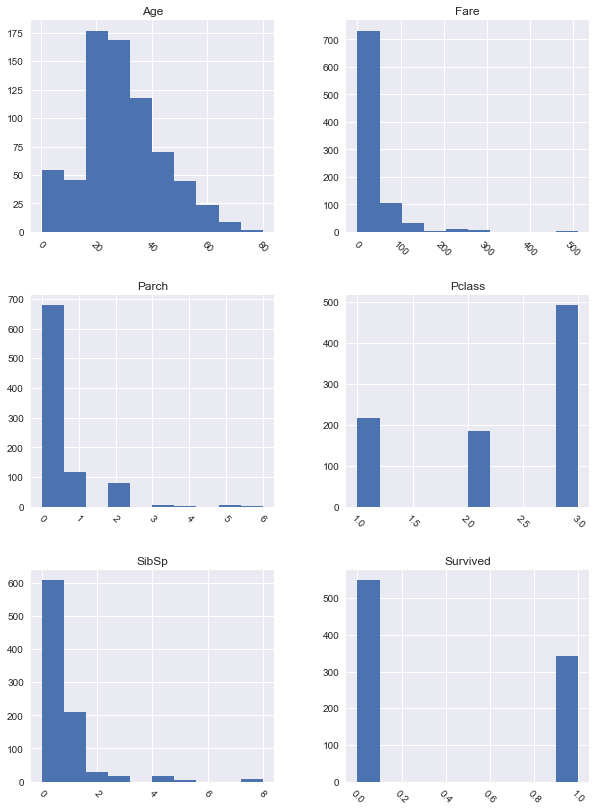

In [32]:
# Plots for numerical features
%matplotlib inline
data.hist(figsize=(10, 14), xrot=-45)

In [31]:
# Plots for categorical features
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jacobsohn, Mr. Sidney Samuel",male,347082,G6,S
freq,1,577,7,4,644


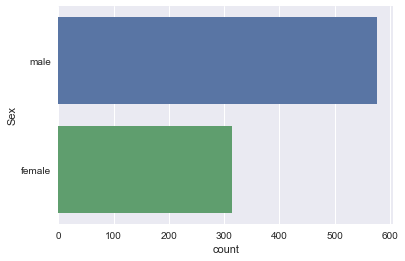

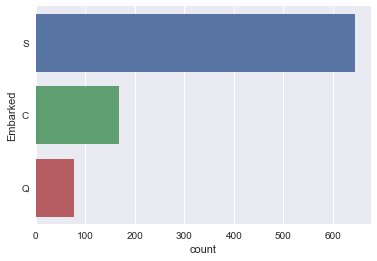

In [34]:
for col in ['Sex', 'Embarked']:
    sns.countplot(data=data, y=col)
    plt.show()